## **Discount model: Complete pipeline**

In [3]:
import time
import Discount

In [12]:
DATA_PATH = '../data/'
EXPORT_PATH = '../export/'

files = {
    'data': [
        DATA_PATH + 'baskets.parquet',
        DATA_PATH + 'coupon_index.parquet', 
        DATA_PATH + 'coupons.parquet',
        #DATA_PATH + 'prepare.parquet'
   ]
}

In [13]:
start = time.time()
# initializing the model
discount_model = Discount.No_Cross_Effects()

# reading files and reducing data size
print(f"[discount pipeline] reading files... (elapsed time: {discount_model._format_time(time.time() - start)})")
discount_model.load(files)
for name, df in discount_model.data.items():
    discount_model.data[name] = discount_model.reduce_data_size(discount_model.data[name])

# data preparations
print(f"[discount pipeline] merging data... (elapsed time: {discount_model._format_time(time.time() - start)})")
discount_model.get_merged()

print(f"[discount pipeline] cleaning data... (elapsed time: {discount_model._format_time(time.time() - start)})")
discount_model.clean()

print(f"[discount pipeline] creating data maps... (elapsed time: {discount_model._format_time(time.time() - start)})")
discount_model.get_price_map(df=discount_model.data['clean']) # here: uses only the data on shoppers 0 to 1999, should be done on all shoppers
discount_model.get_history_map(mapping='product_histories')

print(f"[discount pipeline] preparing the data... (elapsed time: {discount_model._format_time(time.time() - start)})")
discount_model.prepare(week=(86,90))
#discount_model.prepare(week=(86,90), shopper=(0,9), product=(1,19))

[discount pipeline] reading files... (elapsed time: 00:00)
[discount pipeline] merging data... (elapsed time: 00:13)
[discount pipeline] cleaning data... (elapsed time: 01:24)
[discount pipeline] creating data maps... (elapsed time: 01:39)


100%|██████████| 1378720/1378720 [00:38<00:00, 36280.78it/s]


[discount pipeline] preparing the data... (elapsed time: 02:57)
[prepare] itertools... (elapsed time: 00:00)
[prepare] merge... (elapsed time: 00:02)
[prepare] cleaning... (elapsed time: 00:03)


  0%|          | 4056/2500000 [00:00<01:55, 21587.29it/s]

[prepare] feature creation... (elapsed time: 02:20)


100%|██████████| 2500000/2500000 [02:25<00:00, 17197.31it/s]

[prepare] done (elapsed time: 57:30)


,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
0,0,86,0,688.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1,0,86,1,560.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2,0,86,2,773.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
3,0,86,3,722.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
4,0,86,4,620.0,0.0,0.0,16.0,0.0,0.000000,0.0,0.093023
...,...,...,...,...,...,...,...,...,...,...,...
2499995,1999,90,245,549.0,0.0,0.0,1.0,1.0,0.333333,0.2,0.133333
2499996,1999,90,246,702.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2499997,1999,90,247,670.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2499998,1999,90,248,490.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000


In [17]:
!y

zsh:1: command not found: y


In [19]:
model_config = {
    'test_week': 90,
    'train_window': 4,
    'n_coupons': 5,
    'discounts': [0.15, 0.2, 0.25, 0.3]
}

top_coupons = discount_model.pipeline(**model_config)
print(f"[discount pipeline] done (elapsed time: {discount_model._format_time(time.time() - start)})")
top_coupons

[discount] train-log-loss: 0.076118548022094
[discount pipeline] done (elapsed time: 50:39)


,shopper,week,coupon,product,discount
1171,0,90,0,171,0.15
1076,0,90,1,76,0.15
1157,0,90,2,157,0.15
1067,0,90,3,67,0.15
1004,0,90,4,4,0.30
...,...,...,...,...,...
2499825,1999,90,0,75,0.15
2499963,1999,90,1,213,0.15
2499791,1999,90,2,41,0.15
2499803,1999,90,3,53,0.25


<AxesSubplot:>

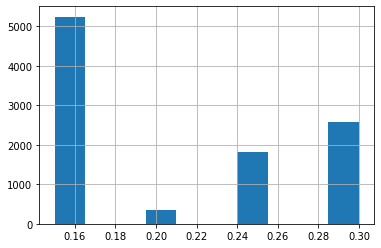

In [20]:
# discount distributions
top_coupons['discount'].hist()

In [21]:
discount_model.dump(DATA_PATH, which='data')

<br>
<br>
<br>

### **Iteratively creating the final output**

In [7]:
discount_model = Discount.No_Cross_Effects()
discount_model.load(files)

# reduce file sizes
for name, df in discount_model.data.items():
    discount_model.data[name] = discount_model.reduce_data_size(discount_model.data[name])

In [8]:
discount_model.get_merged()

,week,shopper,product,price,discount
0,0,0,71,629.0,NaN
1,0,0,91,605.0,NaN
2,0,0,116,715.0,NaN
3,0,0,123,483.0,NaN
4,0,0,157,592.0,NaN
...,...,...,...,...,...
111133550,89,99998,167,NaN,20.0
111133551,89,99999,62,NaN,40.0
111133552,89,99999,37,NaN,40.0
111133553,89,99999,155,NaN,25.0


In [9]:
discount_model.clean()

,week,shopper,product,price,discount,purchased
0,0,0,71,629.0,0.00,1
1,0,0,91,605.0,0.00,1
2,0,0,116,715.0,0.00,1
3,0,0,123,483.0,0.00,1
4,0,0,157,592.0,0.00,1
...,...,...,...,...,...,...
110673244,89,1998,101,NaN,0.25,0
110673245,89,1999,207,NaN,0.25,0
110673246,89,1999,246,NaN,0.30,0
110673247,89,1999,51,NaN,0.15,0


In [10]:
# here: uses only the data on shoppers 0 to 1999, should be done on all shoppers
discount_model.get_price_map(df=discount_model.data['clean'])

/Applications/Conda/anaconda3/envs/mlim/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1378720/1378720 [00:38<00:00, 36119.13it/s]


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,"[688.0, 688.0, 688.0, 688.0, 688.0, 688.0, 688...","[560.0, 560.0, 560.0, 560.0, 560.0, 560.0, 560...","[773.0, 773.0, 773.0, 773.0, 773.0, 773.0, 773...","[722.0, 722.0, 721.3333333333334, 722.0, 722.0...","[620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620...","[721.0, 721.0, 721.0, 721.0, 721.0, 721.0, 721...","[568.0, 568.0, 568.0, 568.0, 568.0, 568.0, 568...","[772.0, 772.0, 772.0, 772.0, 772.0, 772.0, 772...","[669.0, 669.0, 669.0, 669.0, 669.0, 669.0, 669...","[759.0, 759.0, 759.0, 759.0, 759.0, 759.0, 759...",...,"[528.0, 528.0, 528.0, 528.0, 528.0, 528.0, 528...","[699.0, 699.0, 699.0, 699.0, 699.0, 698.461538...","[511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[694.0, 694.0, 694.0, 694.0, 694.0, 694.0, 694...","[548.75, 549.0, 549.0, 549.0, 549.0, 549.0, 54...","[702.0, 702.0, 702.0, 702.0, 702.0, 702.0, 702...","[670.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499..."
1,"[688.0, 688.0, 688.0, 688.0, 688.0, 688.0, 688...","[560.0, 560.0, 560.0, 560.0, 560.0, 560.0, 560...","[773.8461538461538, 773.0, 773.0, 773.0, 773.0...","[722.0, 722.0, 722.0, 722.0, 722.0, 722.0, 722...","[620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620...","[721.0, 721.0, 721.0, 721.0, 721.6666666666667...","[568.0, 568.0, 568.0, 568.0, 568.0, 568.0, 568...","[772.0, 772.0, 772.0, 772.0, 772.0, 772.0, 772...","[669.0, 669.0, 667.6923076923076, 669.0, 669.0...","[759.0, 759.0, 759.0, 759.0, 759.0, 759.0, 759...",...,"[528.0, 528.0, 528.0, 528.0, 528.0, 528.0, 528...","[699.0, 699.0, 699.0, 699.0, 699.0, 699.0, 699...","[511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[694.0, 694.0, 694.0, 694.0, 694.0, 694.0, 694...","[549.0, 549.0, 549.0, 549.0, 549.0, 549.0, 549...","[702.0, 702.0, 702.0, 702.0, 702.0, 702.0, 702...","[670.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499..."
2,"[688.0, 688.0, 688.0, 688.0, 688.0, 688.0, 688...","[560.0, 560.0, 560.0, 560.0, 560.0, 560.0, 560...","[773.0, 773.0, 773.0, 773.0, 773.0, 772.857142...","[722.0, 722.0, 722.0, 722.0, 722.0, 722.0, 722...","[620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620...","[721.0, 721.4285714285714, 721.0, 721.0, 721.0...","[568.0, 568.0, 568.0, 568.0, 568.0, 568.0, 568...","[772.0, 772.3076923076923, 772.0, 772.0, 772.0...","[668.5714285714287, 669.0, 669.0, 669.0, 669.0...","[759.0, 759.0, 758.6666666666666, 759.0, 759.0...",...,"[528.0, 528.0, 528.0, 528.0, 527.1428571428572...","[699.0, 699.0, 699.0, 699.0, 699.0, 699.0, 699...","[511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[694.0, 694.0, 694.0, 694.0, 694.0, 694.0, 694...","[549.0, 549.0, 549.0, 549.0, 549.0, 549.0, 549...","[702.0, 702.0, 702.0, 702.0, 702.0, 702.0, 702...","[670.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[499.0, 499.0, 498.5714285714286, 498.88888888..."
3,"[688.0, 688.0, 688.0, 688.0, 688.0, 687.692307...","[560.0, 560.0, 560.0, 560.0, 560.0, 560.0, 560...","[773.0, 773.0, 773.0, 773.0, 773.0, 773.0, 773...","[722.0, 722.0, 722.0, 722.0, 722.2222222222222...","[620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620...","[721.0, 721.0, 721.0, 721.0, 721.0, 721.0, 721...","[568.0, 568.0, 568.0, 568.0, 568.0, 568.0, 568...","[772.0, 772.0, 772.0, 771.7647058823529, 772.0...","[669.0, 669.0, 669.0, 669.0, 669.0, 669.0, 669...","[759.0, 759.0, 759.0, 759.0, 759.0, 759.0, 759...",...,"[528.0, 527.7777777777777, 528.0, 528.23529411...","[699.0, 699.0, 699.0, 699.0, 699.0, 699.0, 699...","[511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511...","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490...","[694.0, 694.0, 694.0, 694.0, 694.0, 694.0, 694...","[549.0, 54

In [11]:
discount_model.get_history_map(mapping='product_histories')

/Applications/Conda/anaconda3/envs/mlim/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1378720/1378720 [00:42<00:00, 32277.70it/s]


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,[-inf],[-inf],[-inf],[-inf],"[-inf, 24.0, 40.0, 45.0, 51.0, 54.0, 58.0, 60....",[-inf],[-inf],[-inf],[-inf],[-inf],...,"[-inf, 27.0]",[-inf],[-inf],"[-inf, 44.0]","[-inf, 5.0, 8.0, 20.0, 37.0, 38.0, 56.0, 59.0]",[-inf],[-inf],[-inf],[-inf],"[-inf, 10.0, 26.0, 28.0, 32.0, 35.0, 40.0, 65...."
1,"[-inf, 7.0, 11.0, 48.0, 61.0, 66.0, 81.0]","[-inf, 2.0, 6.0, 18.0, 20.0, 27.0, 29.0, 49.0,...",[-inf],[-inf],"[-inf, 5.0, 13.0, 21.0, 23.0, 30.0, 47.0, 69.0...",[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 4.0, 19.0, 22.0, 35.0, 79.0, 88.0]"
2,[-inf],"[-inf, 2.0, 3.0, 6.0, 7.0, 8.0, 9.0, 11.0, 13....",[-inf],[-inf],[-inf],[-inf],"[-inf, 5.0, 10.0, 15.0, 32.0, 54.0]",[-inf],[-inf],"[-inf, 1.0, 17.0]",...,"[-inf, 4.0, 5.0, 16.0, 18.0, 21.0, 26.0, 33.0,...",[-inf],[-inf],[-inf],[-inf],"[-inf, 75.0]",[-inf],[-inf],"[-inf, 3.0, 14.0, 20.0, 42.0, 45.0, 50.0, 51.0...","[-inf, 0.0, 23.0, 30.0, 31.0, 39.0]"
3,[-inf],[-inf],[-inf],[-inf],"[-inf, 7.0, 19.0, 27.0]",[-inf],"[-inf, 0.0, 13.0, 16.0, 18.0, 20.0, 23.0, 30.0...","[-inf, 11.0, 29.0, 38.0, 47.0, 69.0, 85.0]",[-inf],[-inf],...,[-inf],[-inf],[-inf],"[-inf, 57.0]",[-inf],"[-inf, 14.0, 87.0]",[-inf],[-inf],"[-inf, 2.0, 5.0, 10.0, 23.0, 38.0, 44.0, 47.0,...","[-inf, 16.0, 51.0, 71.0]"
4,[-inf],[-inf],"[-inf, 6.0, 15.0, 21.0, 22.0, 27.0, 28.0, 58.0...",[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,[-inf],"[-inf, 1.0, 4.0, 8.0, 21.0, 23.0, 24.0, 25.0, ...",[-inf],[-inf],[-inf],[-inf],"[-inf, 10.0, 17.0, 22.0, 56.0, 66.0, 85.0, 86....",[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 0.0, 6.0, 8.0, 9.0, 15.0, 22.0, 37.0, 4...",[-inf]
1996,[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 0.0, 2.0, 5.0, 10.0, 20.0, 32.0, 37.0, ...",[-inf],"[-inf, 41.0]",[-inf],"[-inf, 54.0]",...,[-inf],[-inf],"[-inf, 12.0, 19.0, 86.0]",[-inf],[-inf],[-inf],"[-inf, 6.0]",[-inf],[-inf],"[-inf, 0.0, 1.0, 4.0, 5.0, 7.0, 8.0, 10.0, 14...."
1997,"[-inf, 37.0, 74.0]",[-inf],[-inf],[-inf],[-inf],"[-inf, 54.0]",[-inf],[-inf],[-inf],[-inf],...,[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],[-inf],"[-inf, 14.0, 28.0, 44.0, 45.0, 48.0, 50.0, 56...."
1998,"[-inf, 12.0, 52.0, 54.0]","[-inf, 8.0, 36.0, 44.0, 82.0, 85.0]",[-inf],[-inf],"[-inf, 56.0, 61.0]",[-inf],[-inf],"[-inf, 53.0]","[-inf, 7.0]",[-inf],...,[-inf],[-inf],"[-inf, 25.0]",[-inf],"[-inf, 34.0, 63.0, 67.0, 81.0]",[-inf],[-inf],"[-inf, 3.0, 17.0, 29.0, 30.0, 51.0, 58.0, 75.0]",[-inf],[-inf]


In [12]:
discount_model.prepare(week=(86,90), shopper=(0,9), product=(1,19))

/Applications/Conda/anaconda3/envs/mlim/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[prepare] itertools... (elapsed time: 00:00)
[prepare] merge... (elapsed time: 00:00)
[prepare] cleaning... (elapsed time: 00:01)


  0%|          | 0/950 [00:00<?, ?it/s]

[prepare] feature creation... (elapsed time: 00:04)


100%|██████████| 950/950 [00:00<00:00, 2055.25it/s]


[prepare] done (elapsed time: 00:06)


,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
0,0,86,1,560.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1,0,86,2,773.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
2,0,86,3,722.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
3,0,86,4,620.0,0.0,0.0,16.0,0.0,0.0,0.0,0.093023
4,0,86,5,721.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
945,9,90,15,620.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
946,9,90,16,743.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
947,9,90,17,725.0,0.0,0.0,14.0,0.0,0.0,0.0,0.044444
948,9,90,18,665.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000


In [13]:
model_config = {
    'test_week': 90,
    'train_window': 4,
    'n_coupons': 5,
    'discounts': [0.15, 0.2, 0.25, 0.3]
}

# discount_model.compute_optimal_coupons
top_coupons = discount_model.pipeline(90, 4, [0.15, 0.2, 0.25, 0.3])
top_coupons

[discount] train-log-loss: 0.000790962989437093


,shopper,week,coupon,product,discount
89,0,90,0,14,0.15
84,0,90,1,9,0.15
82,0,90,2,7,0.15
77,0,90,3,2,0.15
87,0,90,4,12,0.15
184,1,90,0,14,0.15
179,1,90,1,9,0.15
177,1,90,2,7,0.15
172,1,90,3,2,0.15
182,1,90,4,12,0.15
